<a href="https://colab.research.google.com/github/cfong32/key-sentence-extraction/blob/main/exp2_openai_sbert_cossim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q openai sentence-transformers

In [2]:
# import packages
import openai
import numpy as np
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

# Having some text

In [3]:
MIN_LEN = 10

# split the paragraph into senentences
paragraph = "Democratic presidential candidate Bernie Sanders explained in an interview with ABC News today how in the span of just a few days he suggested that his opponent, Hillary Clinton, was both qualified and unqualified to be president. “In a sense it’s both,” he told ABC News' Cecilia Vega while touring the neighborhood in Brooklyn where he grew up. Sanders questioned Clinton’s judgment on several key issues, including her vote in favor of the war in Iraq, what he called her “dependence” on super PACs and Wall Street money as well as her position on trade agreements like NAFTA.  “Is that person who has that kind of bad judgment qualified to be president of the United States?” Sanders asked. “Well, qualified is a broad word, but I think that judgment lapse suggests that, you know, she might not be the best president that we need.”Sanders added: “On the other hand, if you look at her resume, if you like, at her experience, this was a woman who kind of broke the mold as first lady, and I think a very good job in that respect.” Earlier today in an appearance on ABC’s “The View,” Sanders acknowledged that Clinton was “obviously” experienced enough to be president -- a departure from comments he made two days earlier at a campaign event in Pennsylvania, when he said: “She has been saying lately that she thinks that I am quote-unquote, not qualified to be president. Now, let me, let me just say in response to Secretary Clinton, I don’t believe that she is qualified.” Should she become the nominee, Sanders told Vega that he would do “everything” possible to make sure a candidate from the other side of the aisle doesn’t end up in the White House. “It would be a disaster for this country to have a Donald Trump or some other right-wing Republican in the White House,” Sanders said. The Vermont senator pledged at the outset of his campaign to stay positive. But both he and Clinton have been skirmishing with increasing frequency and intensity ahead of the April 19 New York primary. When asked by Vega if he has any regrets, Sanders said with a laugh, “It’s hard to remember. I’ve said a million things.” He added, “You know, I’m sure that I have, but there’s nothing that particularly comes to mind at this moment.”"
sentences = [s+'.' for s in paragraph.split('.') if len(s.strip()) > MIN_LEN]

# append the whole paragraph to the last (for efficient api call)
sentences.append(paragraph)

len(sentences), sentences

(16,
 ['Democratic presidential candidate Bernie Sanders explained in an interview with ABC News today how in the span of just a few days he suggested that his opponent, Hillary Clinton, was both qualified and unqualified to be president.',
  " “In a sense it’s both,” he told ABC News' Cecilia Vega while touring the neighborhood in Brooklyn where he grew up.",
  ' Sanders questioned Clinton’s judgment on several key issues, including her vote in favor of the war in Iraq, what he called her “dependence” on super PACs and Wall Street money as well as her position on trade agreements like NAFTA.',
  '  “Is that person who has that kind of bad judgment qualified to be president of the United States?” Sanders asked.',
  ' “Well, qualified is a broad word, but I think that judgment lapse suggests that, you know, she might not be the best president that we need.',
  '”Sanders added: “On the other hand, if you look at her resume, if you like, at her experience, this was a woman who kind of bro

# Make text embeddings using Sentence-BERT

In [4]:
# encode embeddings
model = SentenceTransformer('all-MiniLM-L6-v2')
X = embeddings = model.encode(sentences)
X.shape

(16, 384)

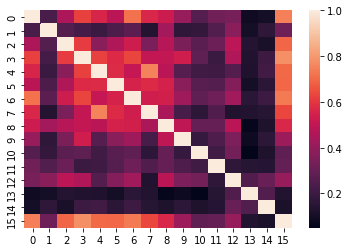

In [5]:
# compute the pairwise cosine similarities
# the last one is the whole paragraph
cossim = cosine_similarity(X, X)
sns.heatmap(cossim)

# Make text embeddings using openai (GPT)

In [6]:
# check connection and authentication with openai
MODEL_TO_USE = 'text-embedding-ada-002'
API_KEY = open('api_key.txt').read()        # the api_key is in a separate txt file

openai.api_key = API_KEY
res = [obj for obj in openai.Engine.list()['data']
       if obj['id'] == MODEL_TO_USE][0]
print(res)

{
  "created": null,
  "id": "text-embedding-ada-002",
  "object": "engine",
  "owner": "openai-internal",
  "permissions": null,
  "ready": true
}


In [7]:
# make API call
res = openai.Embedding.create(
    input=sentences,
    engine=MODEL_TO_USE
)

# pack result into an ndarray
X = np.array([r['embedding'] for r in res['data']])
X.shape

(16, 1536)

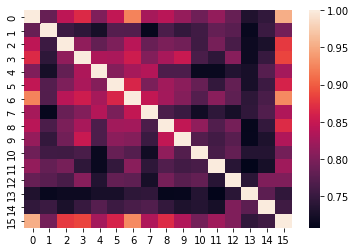

In [8]:
# compute the pairwise cosine similarities
# the last one is the whole paragraph
cossim = cosine_similarity(X, X)
sns.heatmap(cossim)